**Nom et Prénom :**  LONMADON Géofroid

(Ce mini-projet peut être faire seul ou en binôme)

# Mini projet :  Méthode de gradient à pas spectral
----
Le but de ce mini-projet est de programmer, valider et expérimenter la méthode de gradient avec pas spectral.

N.B: N'hésitez pas à diviser vos codes en plusieurs cellules quand c'est possible pour faciliter leurs lectures et éxecutions.

----
On introduit les deux notations :

$$ \left\{
\begin{array}{ccc}
s^{(k-1)} & = & u^{(k)} - u^{(k-1)} \\
y^{(k-1)} & = & \nabla J(u^{(k)}) - \nabla J(u^{(k-1)}) \\
 \end{array}
\right.
$$

**Etape 1**

Reprendre un algorithme de minimisation par gradient à pas variable (ou à pas fixe) :

\begin{equation}
u^{(0)} \textrm{ donné}; \quad u^{(k+1)} = u^{(k)} - \rho_k \nabla J(u^{(k)})
\end{equation}


> Modifier cet algorithme de sorte à ce que le pas $\rho_k$ soit donné par l'une des deux variantes, dites de Barzilaï et Borwein :

$$
\rho^1_k = \dfrac{(s^{(k-1)} ,s^{(k-1)})}{(y^{(k-1)} ,s^{(k-1)})} ;
\qquad 
\rho^2_k = \dfrac{(s^{(k-1)} ,y^{(k-1)})}{(y^{(k-1)} ,y^{(k-1)})}; 
\quad 
\text{ pour } k\geq 1
$$
Cet algorithme (noté BB1 et BB2 selon variante) nécessite donc un pré-calcul du vecteur $u^{(1)}$ avec un pas initial $\rho_0$. A vous de choisir ce premier pas $\rho_0$ comme vous voulez.


In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def J(u):
    gard = 1
    cost = 1
    return (cost, grad)

In [75]:
pas = 1
eps = 1e-6
kmax = 1500

In [76]:
## implémenter l'algorithme BB1
def BB1(J, u0, pas, eps, kmax):
    u = u0.copy()
    rho1 = pas
    list_cost = [] # Pour sauvegarder le coût à chaque ittération
    list_cost.append(J(u)[0])
    
    for i in range(1,kmax):
        uk = u - rho1*J(u)[1]
        s = uk - u
        y = J(uk)[1] - J(u)[1]
        rho1 = np.dot(s,s)/np.dot(y,s)
        u = uk
        list_cost.append(J(u)[0])
        
        if np.linalg.norm(J(u)[1]) <= eps:
            break
            
    return u,i, list_cost
    

In [77]:
## implémenter l'algorithme BB2
def BB2(J, u0, pas, eps, kmax):
    u = u0.copy()
    rho2 = pas
    list_cost = [] # Pour sauvegarder le coût à chaque ittération
    list_cost.append(J(u)[0])
    
    for i in range(1,kmax):
        uk = u - rho2*J(u)[1]
        s = uk - u
        y = J(uk)[1] - J(u)[1]
        rho2 = np.dot(s,y)/np.dot(y,y)
        u = uk.copy()
        
        list_cost.append(J(u)[0])
        
        if np.linalg.norm(J(u)[1]) <= eps:
            break
            
    return u, i, list_cost


----
**Etape 2**

> Effectuer les tests de validation pour les fonctions quadratiques suivantes ($N=10$): 

$$J_1(v) = \sum_{i=1}^{i=N}{(v_i - 1)^2}, \quad J_2(v) = \sum_{i=1}^{i=N}{(v_i - i)^2}$$


$$
\nabla J_1 (v) = 2 \begin{bmatrix} v_1 - 1 \\ v_2 - 1 \\ .\\.\\.\\ v_N - 1\end{bmatrix}
,\quad\quad \nabla J_2 (v) = 2 \begin{bmatrix} v_1 - 1 \\ v_2 - 2 \\ .\\.\\.\\ v_i - i \\.\\.\\.\\ v_N - N\end{bmatrix}
$$

Les solutions optimales exactes pour ces 3 fonctions coût sont :
$$
S_1 = \begin{bmatrix} 1 \\ 1 \\ .\\.\\.\\ 1\end{bmatrix},   \quad      S_2 = \begin{bmatrix} 1 \\ 2 \\ .\\.\\.\\ i \\.\\.\\.\\ N\end{bmatrix}
$$

In [78]:
N = 10

def J1 (v): # retourne la valeur de la fonction et de son gradient
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v): # retourne la valeur de la fonction et de son gradient
    N = len(v)
    
    u = np.zeros(N)
    for i in range(1,N+1):
        u[i-1] = i
    
    return np.dot(v-u,v-u), 2*(v-u)


In [79]:
# Tests de validation pour les fonctions quadratiques suivantes (𝑁=10):
u0 = np.zeros(N)

a = BB1(J1, u0, pas, eps, kmax)
print("\nFonction J1: avec BB1")
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])

a = BB1(J2, u0, pas, eps, kmax)
print("\nFonction J2: avec BB1")
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])

a = BB2(J1, u0, pas, eps, kmax)
print("\nFonction J1: avec BB2")
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])

a = BB2(J2, u0, pas, eps, kmax)
print("\nFonction J2: avec BB2")
print("\nLe nombre d'itérations est : " +str(a[1])+ "\nLe vecteur optimal trouvé est :\n", a[0])



Fonction J1: avec BB1

Le nombre d'itérations est : 2
Le vecteur optimal trouvé est :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Fonction J2: avec BB1

Le nombre d'itérations est : 2
Le vecteur optimal trouvé est :
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

Fonction J1: avec BB2

Le nombre d'itérations est : 2
Le vecteur optimal trouvé est :
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Fonction J2: avec BB2

Le nombre d'itérations est : 2
Le vecteur optimal trouvé est :
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


----
**Etape 3**

On considère les fonctions suivantes (en dimension $N$): 

$$
J_5(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^2}, \quad \quad \quad 
J_6(v) =\frac{1}{2}(Av,v)-(f,v) + \sum_{i=1}^{i=N}{(v_i)^4}
$$

avec $f=(1,\ldots,1)$ et la matrice $A = {\rm tridiag}[-1, 2, -1]$ et la fonction de Rosenbrock 

$$
J_R(v) = \sum_{i=1}^{N-1}(v_{i+1}-v_i^2)^2 + \sum_{i=1}^{N-1} (v_i - 1)^2
$$

> Minimiser les fonctions $J_5$, $J_6$  et $J_R$ par BB1 et par BB2 (pour $N=10, 20, 40$), et comparer les performances de ces deux variantes en traçant sur un même graphique les courbes BB1 et BB2 de $J(u^{(k)})$ en fonction des itérations $k$.

Les gradients des fonctions $J_5$, $J_6$ et $J_R$ sont donnés par les expressions suivantes :
$$
\nabla J_5 (v) = A * \begin{bmatrix} v_1\\v_2\\.\\.\\.\\v_i\\.\\.\\.\\v_N \end{bmatrix} - \begin{bmatrix} 1\\1\\.\\.\\.\\1\\.\\.\\.\\1 \end{bmatrix} + 2* \begin{bmatrix} v_1\\v_2\\.\\.\\.\\v_i\\.\\.\\.\\v_N \end{bmatrix}, \quad \nabla J_6 (v) = A * \begin{bmatrix} v_1\\v_2\\.\\.\\.\\v_i\\.\\.\\.\\v_N \end{bmatrix} - \begin{bmatrix} 1\\1\\.\\.\\.\\1\\.\\.\\.\\1 \end{bmatrix} + 4* \begin{bmatrix} v_1^3\\v_2^3\\.\\.\\.\\v_i^3\\.\\.\\.\\v_N^3 \end{bmatrix}, \quad \nabla J_R (v) = \begin{bmatrix} -4v_1(v_{1+1} - v_1^2) + 2(v_1 - 1) \\ -4v_2(v_{2+1} - v_2^2) + 2(v_2 - 1) + 2(v_2 - v_{2-1}^2) \\ .\\.\\.\\ -4v_i(v_{i+1} - v_i^2) + 2(v_i - 1) + 2(v_i - v_{i-1}^2) \\.\\.\\.\\ 2(v_N - v_{N-1}^2) \end{bmatrix}\\
$$


In [80]:
# Compléter ici
# J5
def J5(v):
    n = len(v)
    A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    f = np.ones(n)
    
    cost = 0.5*np.dot(np.dot(A,v),v) - np.dot(f,v) + np.dot(v,v)
    grad = np.dot(A,v) - f + 2*v
    
    return cost, grad


In [81]:
# J6
def J6(v):
    n = len(v)
    A = 2*np.eye(n) - np.diag(np.ones(n-1),1) - np.diag(np.ones(n-1),-1)
    f = np.ones(n)
    a = 0
    
    for i in range(N):
        a += v[i]**4

    cost = 0.5*np.dot(np.dot(A,v),v) - np.dot(f,v) + a
    grad = np.dot(A,v) - f + 4*v**3
    
    return cost, grad


In [82]:
# JR Rosenbrock
def JR (v):
    N = len (v)
    grad = np.zeros(N)
    cost = 0
    grad[0] = -4 * v[0] * (v[1] - v[0]**2) + 2 * (v[0] - 1)
    
    for i in range(N-1):
        cost += (v[i+1] - v[i]**2)**2 + (v[i] - 1)**2
        
        k = i+1
        if k < N-1:
            grad[k] = -4*v[k]*(v[k+1] - v[k]**2) + 2*(v[k] - 1) + 2*(v[k] - v[k-1]**2)
        
    grad[N-1] = 2 * (v[N-1] - v[N-2]**2)  # Dernière composante du gradient

    return cost, grad

Minimiser les fonctions $𝐽_5$, $𝐽_6$ et $𝐽_𝑅$ par BB1 et par BB2 (pour 𝑁=10,20,40)

In [83]:
pas = 0.8
eps = 1e-6
kmax = 1500

In [84]:
def performence(BBX, BBY, J, u0, pas, kmax):
    B1 = BBX.__name__
    B2 = BBY.__name__
    j = J.__name__

    a = BBX(J, u0, pas, eps, kmax)
    b = BBY(J, u0, pas, eps, kmax)
    
    print("\nFonction " +j+ " : avec ", B1)
    print("\nLe nombre d'itérations est : " +str(a[1])+ "\n\nLe vecteur optimal trouvé est :\n\n", a[0])
    
    print("\nFonction " +j+ " : avec ", B2)
    print("\nLe nombre d'itérations est : " +str(b[1])+ "\n\nLe vecteur optimal trouvé est :\n\n", b[0])
    
    its1 = list(range(a[1]+1))
    its2 = list(range(b[1]+1))
    
    #plt.style.use('seaborn')
    plt.plot(its1 , a[2], "-r", label=B1)
    plt.plot(its2, b[2], "-b", label=B2)
    plt.xlabel('ittérations')
    plt.ylabel('J(uk)')
    plt.legend()
    plt.show()
    


Fonction J5 : avec  BB1

Le nombre d'itérations est : 14

Le vecteur optimal trouvé est :

 [0.36602454 0.46409812 0.49036783 0.4973731  0.49912443 0.49912443
 0.4973731  0.49036783 0.46409812 0.36602454]

Fonction J5 : avec  BB2

Le nombre d'itérations est : 14

Le vecteur optimal trouvé est :

 [0.36602453 0.46409812 0.49036785 0.49737314 0.49912447 0.49912447
 0.49737314 0.49036785 0.46409812 0.36602453]


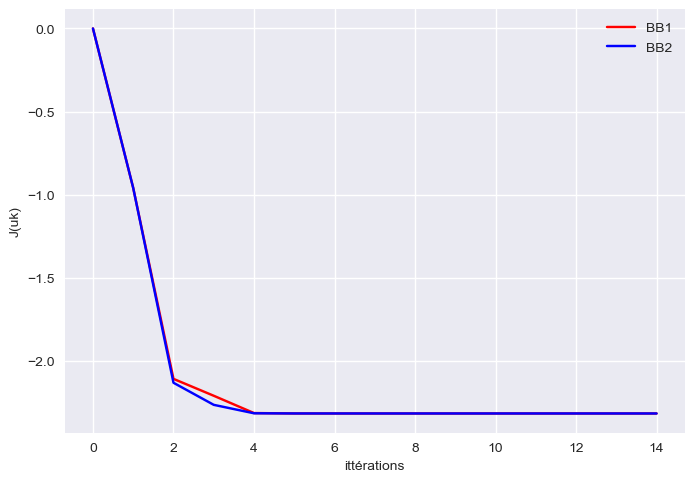

In [85]:
# N = 10
N = 10
u0 = np.zeros(N)
performence(BB1, BB2, J5, u0, pas, kmax)


Fonction J6 : avec  BB1

Le nombre d'itérations est : 13

Le vecteur optimal trouvé est :

 [0.52207201 0.61332606 0.62743685 0.62957729 0.62989402 0.62989402
 0.62957729 0.62743685 0.61332606 0.52207201]

Fonction J6 : avec  BB2

Le nombre d'itérations est : 13

Le vecteur optimal trouvé est :

 [0.52207201 0.61332607 0.62743684 0.62957731 0.62989401 0.62989401
 0.62957731 0.62743684 0.61332607 0.52207201]


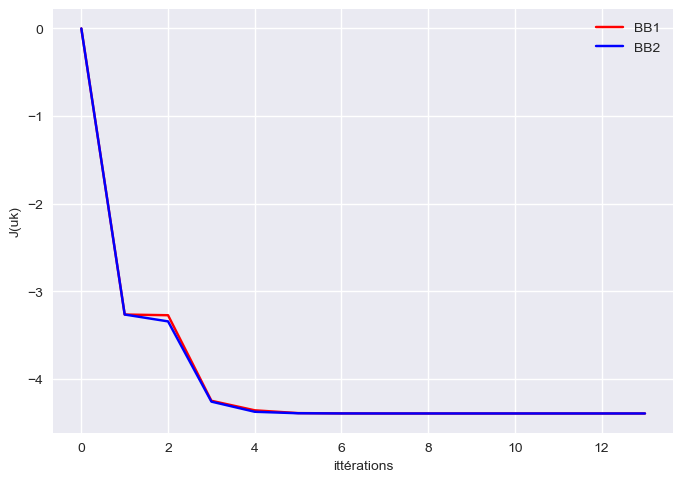

In [86]:
pas = 0.8
eps = 1e-6

# N = 10
N = 10
u0 = np.zeros(N)
performence(BB1, BB2, J6, u0, pas, kmax)



Fonction JR : avec  BB1

Le nombre d'itérations est : 59

Le vecteur optimal trouvé est :

 [1.00000003 1.00000003 1.00000002 1.00000003 1.00000004 1.00000002
 1.00000003 1.00000001 1.         1.        ]

Fonction JR : avec  BB2

Le nombre d'itérations est : 64

Le vecteur optimal trouvé est :

 [0.99999998 0.99999998 0.99999999 1.         1.00000001 1.00000002
 1.00000001 0.99999997 0.99999989 0.99999971]


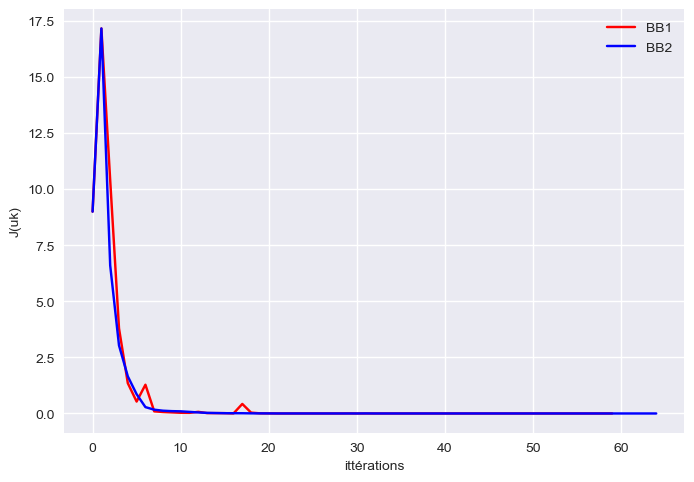

In [87]:
# N = 10
N = 10
u0 = np.zeros(N)
performence(BB1, BB2, JR, u0, pas, kmax)



Fonction J5 : avec  BB1

Le nombre d'itérations est : 14

Le vecteur optimal trouvé est :

 [0.36602547 0.46410164 0.49038102 0.49742262 0.49930946 0.49981502
 0.49995041 0.49998669 0.49999639 0.49999884 0.49999884 0.49999639
 0.49998669 0.49995041 0.49981502 0.49930946 0.49742262 0.49038102
 0.46410164 0.36602547]

Fonction J5 : avec  BB2

Le nombre d'itérations est : 14

Le vecteur optimal trouvé est :

 [0.36602541 0.46410162 0.49038105 0.49742263 0.49930941 0.49981497
 0.49995043 0.4999867  0.49999639 0.49999883 0.49999883 0.49999639
 0.4999867  0.49995043 0.49981497 0.49930941 0.49742263 0.49038105
 0.46410162 0.36602541]


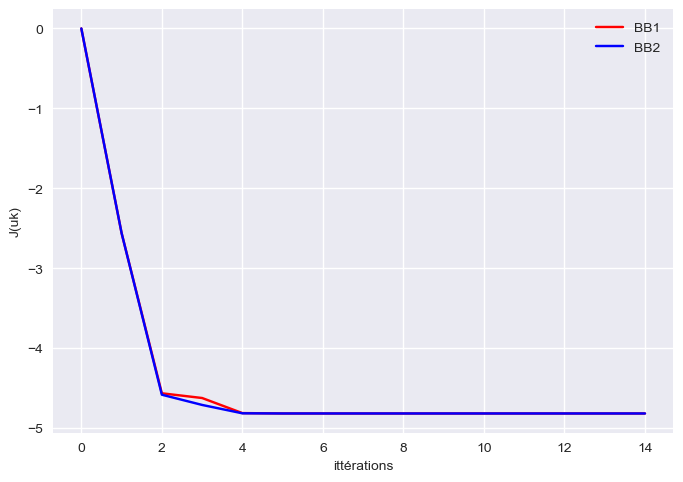

In [88]:
# N = 20
N = 20
u0 = np.zeros(N)
performence(BB1, BB2, J5, u0, pas, kmax)



Fonction J6 : avec  BB1

Le nombre d'itérations est : 13

Le vecteur optimal trouvé est :

 [0.52207198 0.6133261  0.62743706 0.62957861 0.62990276 0.62995176
 0.62995924 0.62996032 0.6299605  0.62996051 0.62996051 0.6299605
 0.62996032 0.62995924 0.62995176 0.62990276 0.62957861 0.62743706
 0.6133261  0.52207198]

Fonction J6 : avec  BB2

Le nombre d'itérations est : 13

Le vecteur optimal trouvé est :

 [0.522072   0.61332609 0.62743702 0.62957863 0.62990276 0.62995178
 0.62995921 0.62996032 0.62996049 0.62996052 0.62996052 0.62996049
 0.62996032 0.62995921 0.62995178 0.62990276 0.62957863 0.62743702
 0.61332609 0.522072  ]


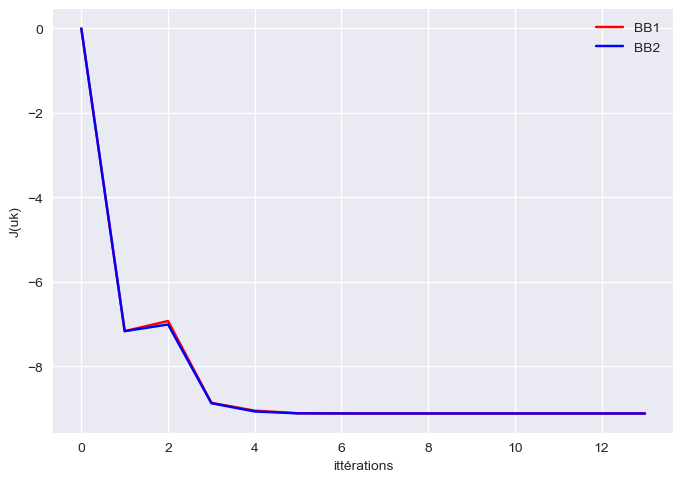

In [89]:
# N = 20
N = 20
u0 = np.zeros(N)
performence(BB1, BB2, J6, u0, pas, kmax)



Fonction JR : avec  BB1

Le nombre d'itérations est : 57

Le vecteur optimal trouvé est :

 [1.         0.99999999 1.         1.         0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999998 0.99999997 0.99999994 0.99999985 0.99999964
 0.9999991  0.99999777]

Fonction JR : avec  BB2

Le nombre d'itérations est : 61

Le vecteur optimal trouvé est :

 [1.00000001 1.00000001 1.         0.99999999 0.99999998 0.99999997
 0.99999997 0.99999998 1.         1.00000001 1.00000004 1.00000005
 1.00000006 1.00000006 1.00000005 1.00000002 0.99999996 0.99999984
 0.99999956 0.99999887]


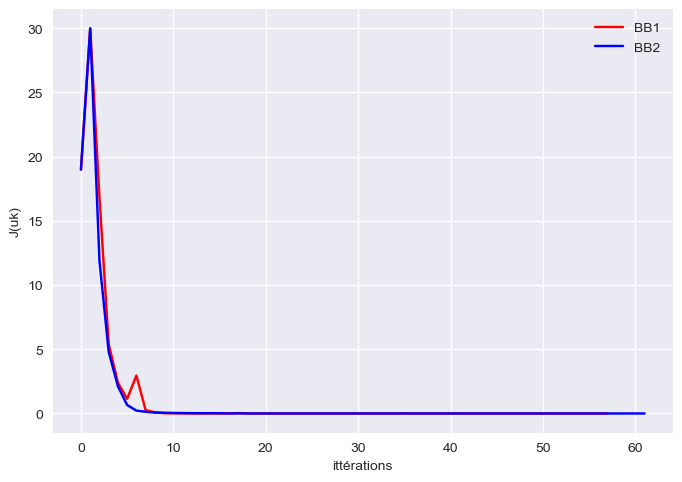

In [90]:
# N = 20
N = 20
u0 = np.zeros(N)
performence(BB1, BB2, JR, u0, pas, kmax)



Fonction J5 : avec  BB1

Le nombre d'itérations est : 16

Le vecteur optimal trouvé est :

 [0.36602541 0.46410162 0.49038106 0.49742261 0.49930939 0.49981495
 0.49995041 0.49998672 0.49999644 0.49999905 0.49999974 0.49999993
 0.49999998 0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.49999998 0.49999993 0.49999974
 0.49999905 0.49999644 0.49998672 0.49995041 0.49981495 0.49930939
 0.49742261 0.49038106 0.46410162 0.36602541]

Fonction J5 : avec  BB2

Le nombre d'itérations est : 14

Le vecteur optimal trouvé est :

 [0.36602546 0.46410164 0.49038103 0.49742262 0.49930945 0.499815
 0.49995039 0.49998671 0.49999646 0.49999909 0.49999975 0.49999994
 0.5        0.50000003 0.50000003 0.50000003 0.50000003 0.50000003
 0.50000003 0.50000003 0.50000003 0.50000003 0.50000003 0.50000003
 0.50000003 0.50000003 0.50000003 0.5        0.49999994 0.49999975
 0.49999909 0.49999646 0.49998671 0.49995039 0.

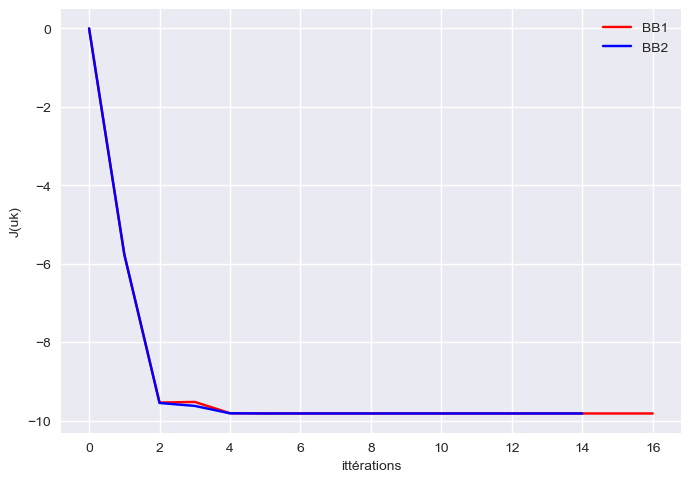

In [91]:
# N = 40
N = 40
u0 = np.zeros(N)
performence(BB1, BB2, J5, u0, pas, kmax)



Fonction J6 : avec  BB1

Le nombre d'itérations est : 13

Le vecteur optimal trouvé est :

 [0.52207198 0.61332612 0.62743705 0.62957862 0.62990277 0.62995175
 0.62995923 0.62996032 0.6299605  0.6299605  0.62996054 0.62996052
 0.62996052 0.62996052 0.62996052 0.62996052 0.62996052 0.62996052
 0.62996052 0.62996052 0.62996052 0.62996052 0.62996052 0.62996052
 0.62996052 0.62996052 0.62996052 0.62996052 0.62996052 0.62996054
 0.6299605  0.6299605  0.62996032 0.62995923 0.62995175 0.62990277
 0.62957862 0.62743705 0.61332612 0.52207198]

Fonction J6 : avec  BB2

Le nombre d'itérations est : 13

Le vecteur optimal trouvé est :

 [0.52207198 0.6133261  0.62743706 0.62957862 0.62990275 0.62995176
 0.62995924 0.62996032 0.6299605  0.62996051 0.62996053 0.62996052
 0.62996053 0.62996053 0.62996053 0.62996053 0.62996053 0.62996053
 0.62996053 0.62996053 0.62996053 0.62996053 0.62996053 0.62996053
 0.62996053 0.62996053 0.62996053 0.62996053 0.62996052 0.62996053
 0.62996051 0.6299605  0.629960

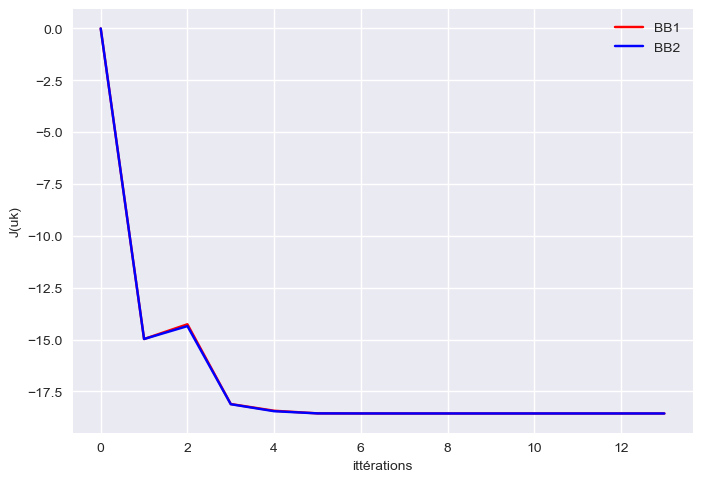

In [92]:
# N = 40
N = 40
u0 = np.zeros(N)
performence(BB1, BB2, J6, u0, pas, kmax)



Fonction JR : avec  BB1

Le nombre d'itérations est : 62

Le vecteur optimal trouvé est :

 [0.99999999 0.99999999 1.         1.00000001 1.00000002 1.
 0.99999998 0.99999999 1.00000001 1.00000003 1.00000001 0.99999998
 0.99999997 1.         1.00000002 1.00000002 1.         0.99999997
 0.99999998 1.00000001 1.00000003 1.00000002 0.99999999 0.99999997
 0.99999999 1.00000002 1.00000002 0.99999999 0.99999997 0.99999998
 1.00000001 1.00000002 1.00000001 1.         1.         1.00000003
 1.00000007 1.00000013 1.00000029 1.00000072]

Fonction JR : avec  BB2

Le nombre d'itérations est : 53

Le vecteur optimal trouvé est :

 [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.999999

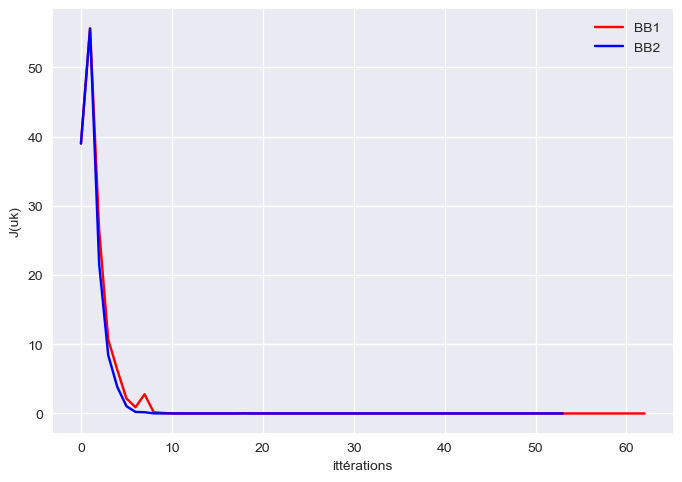

In [93]:
# N = 40
N = 40
u0 = np.zeros(N)
performence(BB1, BB2, JR, u0, pas, kmax)


**Etape 4**

> Comparer pour la fonction $J_R$ les performances des méthodes BB1 (ou BB2) et de l'algorithme NLCG (Fletcher-Reeves à pas constant) développé en TP2 : Comme avant, cette comparaison doit être faite en traçant les courbes de $J(u^{(k)})$ en fonction des itérations $k$ pour les différents algorithmes. 

> Refaire la même chose pour la fonction $J_H$ (du TP1).

On rappelle que $J_H$ est donnée par $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$.

**Pseudocode** de l'algorithme de NLCG

>  
- Initialisation: $u_0 \in {\mathbb R}^n$ arbitraire, $d_0 = \nabla J(u_0) \in {\mathbb R}^n$ et un pas fixe $\rho>0$
- Itérations: répéter pour $k=0,1,\dots$
  - calculer le gradient $G_k = \nabla J (u_{k})$;
  - poser $u_{k+1} = u_{k} - \rho d_k$;
  - calculer le gradient $G_{k+1}=\nabla J (u_{k+1})$;
  - calculer $\beta_k$,
  $$
  \beta_k = \frac{ \langle G_{k+1}, G_{k+1}\rangle}{\langle G_{k}, G_{k}\rangle}; \quad\text{ (Fletcher-Reeves) }
  $$
  - poser $d_{k+1} = \nabla J(u_{k+1}) + \beta_k d_k$;
- Critère d'arrêt:  $\| d_k \|_2 \leq \epsilon'$


In [94]:
# Compléter ici 
# L'algorithme du NLGC
def NLCG(J, u0, rho, eps, kmax):
    u = u0.copy()
    
    list_cost = []
    
    d1 = J(u)[1]
    list_cost.append(J(u)[0])
    
    for k in range(kmax):
        d = d1
        G1 = J(u)[1]
        u = u - rho*d
        G2 = J(u)[1]
        
        beta = np.dot(G2, G2) / np.dot(G1, G1)
        
        d1 = G2 + beta*d
        
        list_cost.append(J(u)[0])
        
        if np.linalg.norm(d) <= eps:
            break
        
    return u, k+1, list_cost



Fonction JR : avec  BB1

Le nombre d'itérations est : 70

Le vecteur optimal trouvé est :

 [1.         1.00000001 1.         1.         1.         0.99999998
 0.99999997 0.99999994 0.99999983 0.9999996 ]

Fonction JR : avec  NLCG

Le nombre d'itérations est : 72

Le vecteur optimal trouvé est :

 [1.         1.         0.99999999 0.99999999 0.99999999 0.99999999
 0.99999997 0.99999994 0.99999984 0.9999996 ]


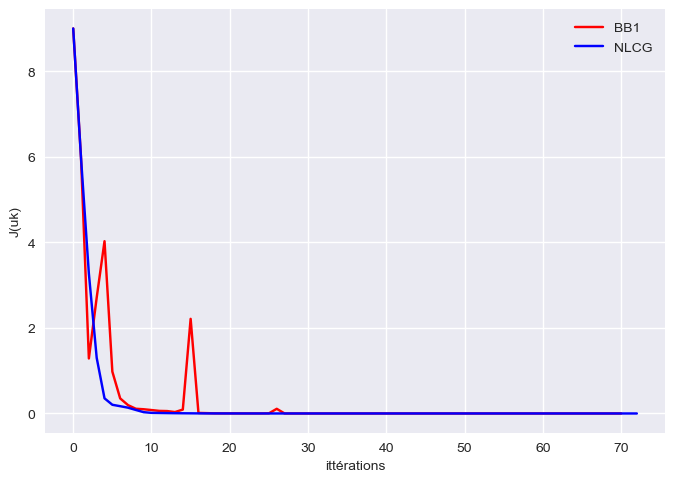

In [95]:
pas = 0.1
eps = 1e-6

# N = 10
N = 10
u0 = np.zeros(N)
performence(BB1, NLCG, JR, u0, pas, kmax)


Fonction JR : avec  BB1

Le nombre d'itérations est : 74

Le vecteur optimal trouvé est :

 [0.99999999 0.99999999 0.99999998 0.99999998 0.99999999 0.99999999
 1.         0.99999998 0.99999998 0.99999997 0.99999998 0.99999998
 1.         1.         1.         0.99999999 0.99999998 0.99999999
 0.99999999 0.99999999]

Fonction JR : avec  NLCG

Le nombre d'itérations est : 73

Le vecteur optimal trouvé est :

 [1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999999 0.99999999 1.
 1.         1.         1.         0.99999999 0.99999998 0.99999994
 0.99999985 0.99999963]


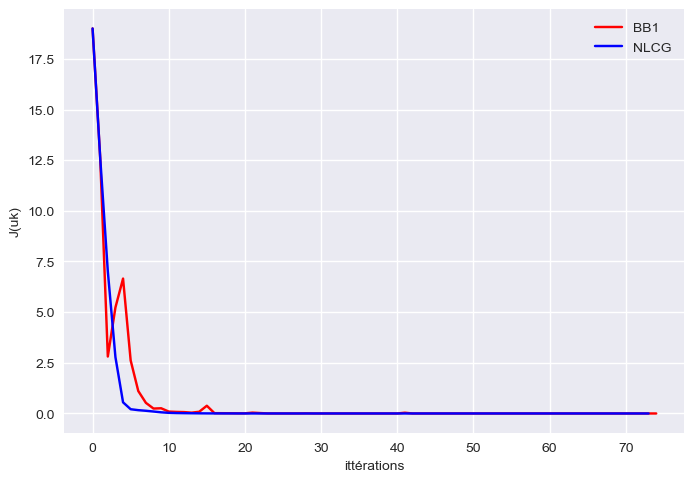

In [96]:
# N = 20
N = 20
u0 = np.zeros(N)
performence(BB1, NLCG, JR, u0, pas, kmax)



Fonction JR : avec  BB1

Le nombre d'itérations est : 68

Le vecteur optimal trouvé est :

 [0.99999999 1.         0.99999999 1.         1.         1.
 1.00000001 1.00000001 1.00000002 1.00000002 1.00000002 1.00000003
 1.00000003 1.00000003 1.00000003 1.00000003 1.00000003 1.00000002
 1.00000003 1.00000002 1.00000002 1.00000001 1.00000001 1.
 1.         1.         1.         0.99999999 1.         0.99999999
 1.         1.         1.         1.         1.         0.99999999
 0.99999997 0.99999991 0.99999977 0.99999942]

Fonction JR : avec  NLCG

Le nombre d'itérations est : 73

Le vecteur optimal trouvé est :

 [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.00000001
 1.         1.00000001 1.00000001 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99999999 0.99999999
 0.99999998

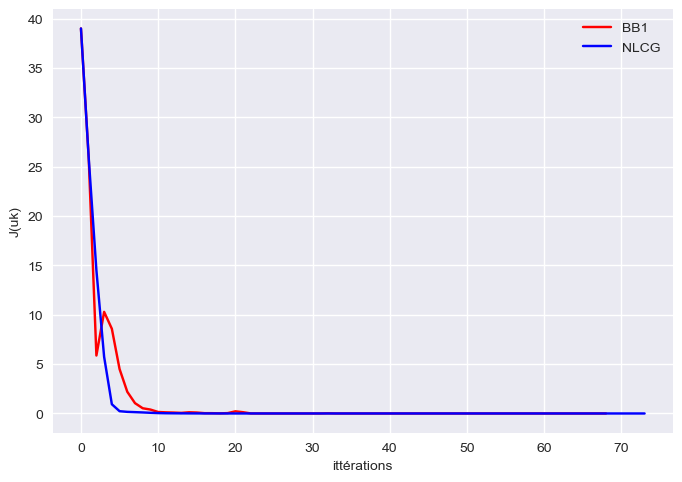

In [97]:
# N = 40
N = 40
u0 = np.zeros(N)
performence(BB1, NLCG, JR, u0, pas, kmax)


In [98]:
def JH(u):
    grad = np.zeros(N)
    x = u[0]
    y = u[1]
    j = (x**2 + y - 2)**2 + (y**2 -2*x + 1)**2
    
    grad = np.zeros(len(u))
    a = 4*(x**3 + x*y - y**2 - 1)
    b = 2*(x**2 -4*x*y + 3*y + 2*y**3 - 2)
    grad[0] = a
    grad[1] = b
    
    return j, grad


Fonction JH : avec  BB1

Le nombre d'itérations est : 13

Le vecteur optimal trouvé est :

 [0.99999999 1.        ]

Fonction JH : avec  NLCG

Le nombre d'itérations est : 33

Le vecteur optimal trouvé est :

 [0.99999988 0.99999991]


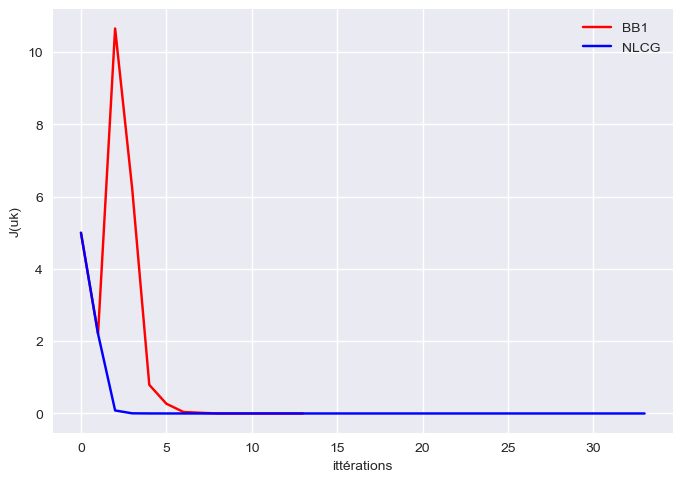

In [101]:
# N = 2
N = 2
u0 = np.zeros(N)
performence(BB1, NLCG, JH, u0, pas, kmax)
